In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\manee\Downloads\archive (18)\housing.csv")

In [4]:
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [5]:
df.shape

(20640, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
lat_long = df[['latitude', 'longitude']]

In [8]:
lat,longg = df.latitude, df.longitude

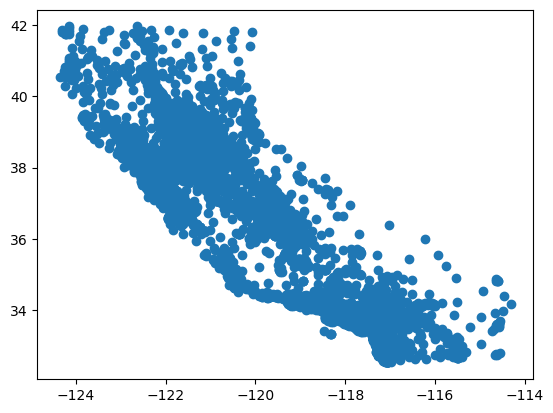

In [9]:
plt.scatter(longg,lat)

In [10]:
from sklearn.cluster import DBSCAN

In [11]:
x = lat_long.to_numpy()

In [27]:
dbscan_cluster_model = DBSCAN(eps = 0.2, min_samples = 15).fit(x)

In [28]:
dbscan_cluster_model

DBSCAN(eps=0.2, min_samples=15)

In [29]:
dbscan_cluster_model.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [30]:
df['cluster'] = dbscan_cluster_model.labels_

In [31]:
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  cluster  
0            NEAR BAY        0  
1            NEAR BAY        0  
2            NEAR BAY        0  
3            NEAR BAY        0  
4            NEAR BAY        0  
...               ...      ...  
20635          INLAND        0  
20636          INLAND        0  
20637          INLAND        0  
20638          INLAND        0  
20639          INLAND        0  

[20640 rows x 11 columns]

In [32]:
df['cluster'].value_counts()

cluster
 6    11249
 0     8545
-1      443
 2      109
 1       98
 3       98
 5       27
 7       22
 8       18
 9       16
 4       15
Name: count, dtype: int64

In [33]:
import plotly.express as px

In [34]:
fig = px.scatter(x= longg, y = lat, color=df['cluster'])

In [35]:
fig.show()

In [36]:
from sklearn.metrics import silhouette_score as ss

In [37]:
ss(x, df['cluster'])

0.21921057255397758

In [38]:
epsilons = np.linspace(0.01, 1, num=15)

In [39]:
epsilons

array([0.01      , 0.08071429, 0.15142857, 0.22214286, 0.29285714,
       0.36357143, 0.43428571, 0.505     , 0.57571429, 0.64642857,
       0.71714286, 0.78785714, 0.85857143, 0.92928571, 1.        ])

In [40]:
min_samples = np.arange(2,20, step=3)

In [41]:
min_samples

array([ 2,  5,  8, 11, 14, 17])

In [42]:
import itertools

In [43]:
combinations = list(itertools.product(epsilons, min_samples))

In [44]:
combinations

[(0.01, 2),
 (0.01, 5),
 (0.01, 8),
 (0.01, 11),
 (0.01, 14),
 (0.01, 17),
 (0.08071428571428571, 2),
 (0.08071428571428571, 5),
 (0.08071428571428571, 8),
 (0.08071428571428571, 11),
 (0.08071428571428571, 14),
 (0.08071428571428571, 17),
 (0.15142857142857144, 2),
 (0.15142857142857144, 5),
 (0.15142857142857144, 8),
 (0.15142857142857144, 11),
 (0.15142857142857144, 14),
 (0.15142857142857144, 17),
 (0.22214285714285714, 2),
 (0.22214285714285714, 5),
 (0.22214285714285714, 8),
 (0.22214285714285714, 11),
 (0.22214285714285714, 14),
 (0.22214285714285714, 17),
 (0.29285714285714287, 2),
 (0.29285714285714287, 5),
 (0.29285714285714287, 8),
 (0.29285714285714287, 11),
 (0.29285714285714287, 14),
 (0.29285714285714287, 17),
 (0.3635714285714286, 2),
 (0.3635714285714286, 5),
 (0.3635714285714286, 8),
 (0.3635714285714286, 11),
 (0.3635714285714286, 14),
 (0.3635714285714286, 17),
 (0.4342857142857143, 2),
 (0.4342857142857143, 5),
 (0.4342857142857143, 8),
 (0.4342857142857143, 11),
 

In [45]:
N = len(combinations)

In [47]:
N

90

In [56]:
def get_scores_and_labels(combinations, x):
    scores = []
    all_labels_list = []
    
    for i, (eps, num_samples) in enumerate(combinations):
        dbscan_cluster_model = DBSCAN(eps=eps, min_samples=num_samples).fit(x)
        labels = dbscan_cluster_model.labels_
        labels_set = set(labels)
        num_clusters = len(labels_set)
        
        if -1 in labels_set:
            num_clusters -= 1  
        
        if (num_clusters < 2) or (num_clusters > 50):
            scores.append(-10)
            all_labels_list.append('bad')
            c = (eps, num_samples)
            print(f'Combination {c} on iteration {i+1} has {num_clusters} clusters. Moving on.')
            continue
        
        scores.append(ss(x, labels))
        all_labels_list.append(labels)
        print(f'Index: {i}, Score: {scores[-1]}, Labels: {all_labels_list[-1]}, NumClusters: {num_clusters}')
    
    best_index = np.argmax(scores)
    best_parameters = combinations[best_index]
    best_labels = all_labels_list[best_index]
    best_score = scores[best_index]  
    
    return {
        'best_epsilon': best_parameters[0],  
        'best_min_sample': best_parameters[1],
        'best_labels': best_labels,
        'best_score': best_score
    }


best_dict = get_scores_and_labels(combinations, x)

Combination (0.01, 2) on iteration 1 has 2391 clusters. Moving on.
Combination (0.01, 5) on iteration 2 has 1114 clusters. Moving on.
Combination (0.01, 8) on iteration 3 has 543 clusters. Moving on.
Combination (0.01, 11) on iteration 4 has 262 clusters. Moving on.
Combination (0.01, 14) on iteration 5 has 128 clusters. Moving on.
Combination (0.01, 17) on iteration 6 has 65 clusters. Moving on.
Combination (0.08071428571428571, 2) on iteration 7 has 124 clusters. Moving on.
Combination (0.08071428571428571, 5) on iteration 8 has 72 clusters. Moving on.
Combination (0.08071428571428571, 8) on iteration 9 has 58 clusters. Moving on.
Combination (0.08071428571428571, 11) on iteration 10 has 54 clusters. Moving on.
Index: 10, Score: 0.23660136566339013, Labels: [ 0  0  0 ... -1 -1 -1], NumClusters: 49
Index: 11, Score: 0.2320816966670719, Labels: [ 0  0  0 ... -1 -1 -1], NumClusters: 47
Combination (0.15142857142857144, 2) on iteration 13 has 53 clusters. Moving on.
Index: 13, Score: 0.1

In [57]:
best_dict

{'best_epsilon': 0.22214285714285714,
 'best_min_sample': 8,
 'best_labels': array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 'best_score': 0.32086158405428405}

In [58]:
df['cluster'] = best_dict['best_labels']

In [59]:
df['cluster'].value_counts()

cluster
 4     11384
 0      8670
-1       166
 3       110
 1       103
 8        37
 13       28
 7        27
 10       19
 14       19
 9        15
 12       14
 2        13
 6        13
 5        11
 11       11
Name: count, dtype: int64

In [60]:
        fig = px.scatter(x= longg, y = lat, color=df['cluster'])
        fig.show()

In [61]:
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  cluster  
0            NEAR BAY        0  
1            NEAR BAY        0  
2            NEAR BAY        0  
3            NEAR BAY        0  
4            NEAR BAY        0  
...               ...      ...  
20635          INLAND        0  
20636          INLAND        0  
20637          INLAND        0  
20638          INLAND        0  
20639          INLAND        0  

[20640 rows x 11 columns]

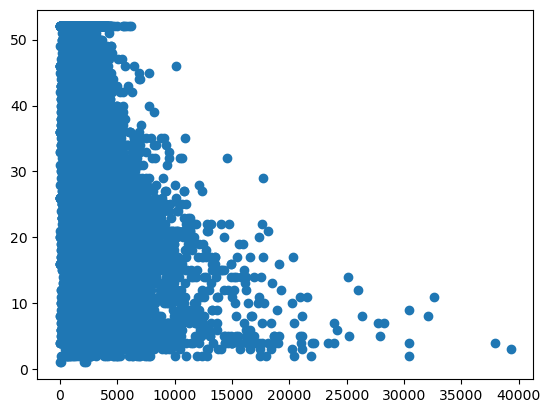

In [62]:
plt.scatter(df.total_rooms, df.housing_median_age)

In [63]:
x2 = df[['total_rooms', 'housing_median_age']].to_numpy()

In [64]:
x2

array([[ 880.,   41.],
       [7099.,   21.],
       [1467.,   52.],
       ...,
       [2254.,   17.],
       [1860.,   18.],
       [2785.,   16.]])

In [65]:
best_dict_2 =get_scores_and_labels(combinations, x2)

Combination (0.01, 2) on iteration 1 has 1199 clusters. Moving on.
Combination (0.01, 5) on iteration 2 has 0 clusters. Moving on.
Combination (0.01, 8) on iteration 3 has 0 clusters. Moving on.
Combination (0.01, 11) on iteration 4 has 0 clusters. Moving on.
Combination (0.01, 14) on iteration 5 has 0 clusters. Moving on.
Combination (0.01, 17) on iteration 6 has 0 clusters. Moving on.
Combination (0.08071428571428571, 2) on iteration 7 has 1199 clusters. Moving on.
Combination (0.08071428571428571, 5) on iteration 8 has 0 clusters. Moving on.
Combination (0.08071428571428571, 8) on iteration 9 has 0 clusters. Moving on.
Combination (0.08071428571428571, 11) on iteration 10 has 0 clusters. Moving on.
Combination (0.08071428571428571, 14) on iteration 11 has 0 clusters. Moving on.
Combination (0.08071428571428571, 17) on iteration 12 has 0 clusters. Moving on.
Combination (0.15142857142857144, 2) on iteration 13 has 1199 clusters. Moving on.
Combination (0.15142857142857144, 5) on iter

In [66]:
best_dict_2

{'best_epsilon': 1.0,
 'best_min_sample': 8,
 'best_labels': array([-1, -1, -1, ..., -1, -1, -1], dtype=int64),
 'best_score': -0.5233492128649596}

In [68]:
from sklearn.preprocessing import StandardScaler

In [69]:
x2_scaled = StandardScaler().fit_transform(x2)

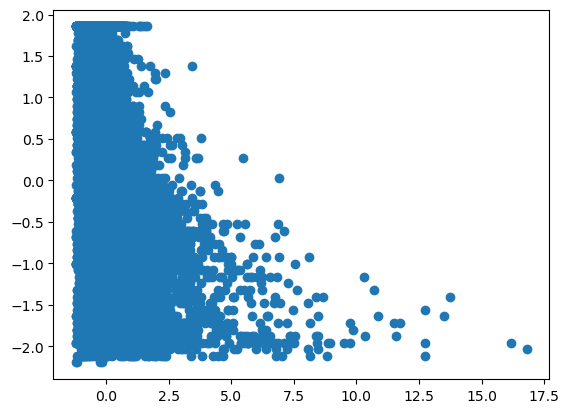

In [70]:
plt.scatter(x2_scaled[:,0], x2_scaled[:,1] )

In [72]:
best_dict_3 =get_scores_and_labels(combinations, x2_scaled)

Combination (0.01, 2) on iteration 1 has 1940 clusters. Moving on.
Combination (0.01, 5) on iteration 2 has 770 clusters. Moving on.
Combination (0.01, 8) on iteration 3 has 440 clusters. Moving on.
Combination (0.01, 11) on iteration 4 has 229 clusters. Moving on.
Combination (0.01, 14) on iteration 5 has 85 clusters. Moving on.
Combination (0.01, 17) on iteration 6 has 53 clusters. Moving on.
Combination (0.08071428571428571, 2) on iteration 7 has 103 clusters. Moving on.
Index: 7, Score: 0.04603739637373008, Labels: [0 0 0 ... 0 0 0], NumClusters: 28
Index: 8, Score: -0.2497477345868444, Labels: [0 2 0 ... 0 0 0], NumClusters: 23
Index: 9, Score: -0.06474545253937586, Labels: [ 0 -1  0 ...  0  0  0], NumClusters: 17
Index: 10, Score: -0.20522721709552, Labels: [ 0 -1  0 ...  0  0  0], NumClusters: 15
Index: 11, Score: -0.28151920092227467, Labels: [ 0 -1  0 ...  0  0  0], NumClusters: 8
Index: 12, Score: 0.20294723650302102, Labels: [0 0 0 ... 0 0 0], NumClusters: 45
Index: 13, Scor

In [73]:
best_dict_3

{'best_epsilon': 1.0,
 'best_min_sample': 2,
 'best_labels': array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 'best_score': 0.8999444401810237}

In [74]:
fig = px.scatter(x= x2_scaled[:,0], y = x2_scaled[:,1], color = best_dict_3['best_labels'])
fig.show()